In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Functions

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import numpy as np
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from itertools import cycle
import plotly.express as px
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

In [ ]:
# One hot encode the labels in order to plot them
#y_onehot = pd.get_dummies(y, columns=model.classes_)

def text_to_number(texts):
  genres_dict = {
      'Action':0,
      'Adventure':1,
      'Animation':2,
      'Comedy':3,
      'Crime':4,
      'Documentary':5,
      'Drama':6,
      'Fantasy':7,
      'History':8,
      'Horror':9,
      'Western':10,
      'Thriller':11,
      'ScienceFiction':12,
      'Family':13,
      'Music':14,
      'Mystery':15,
      'Romance':16,
      'TVMovie':17,
      'War':18,
      '':19
  }
  nums = []
  for text in texts:
    num = genres_dict[text]
    nums.append(num)
  return nums

def rp(text):
 for ch in ["[","]","'"," "]:
   text = text.replace(ch,"")
 return text.split(",")

def label(g):
  g_type = 19
  t_num = 1716
  g_label = np.zeros((t_num,g_type+1))
  for i in range(t_num):
    for j in g[i]:
      g_label[i][j] = 1
  return g_label

def convert_genres_to_label(genres):
  g = []
  for i in range(len(genres)):
    genre = rp(genres[i])
    genre = text_to_number(genre)
    g.append(genre)
  g_label = label(g)
  return g_label

def main(metadata):
  genres = metadata['genres']
  id = metadata['video_key']
  g_label = convert_genres_to_label(genres)
  #Create a dataframe with index = id, g_label = data, colummns = genre_list
  df = pd.DataFrame(data = g_label[:,:19], index = id, columns = ['Action','Adventure','Animation','Comedy','Crime','Documentary','Drama','Fantasy','History','Horror','Western','Thriller','ScienceFiction','Family','Music','Mystery','Romance','TVMovie','War'])
  return df

Normalized confusion matrix
[[0.5 0.5]
 [0.5 0.5]]


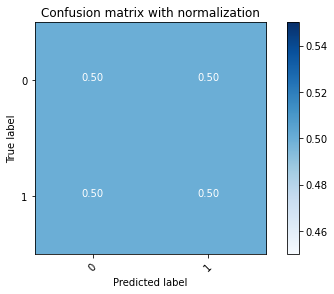

In [ ]:
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
import itertools
import numpy as np

def plot_confusion_matrix(truth, pred, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):

    plt.figure()
    cm = confusion_matrix(truth, pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# example call
plot_confusion_matrix([1,1,0,0], [0,1,0,1], classes=[0,1], normalize=True, title='Confusion matrix with normalization')

In [ ]:
#compute evalution matrix
def precision(label, confusion_matrix):
    col = confusion_matrix[:, label]
    return confusion_matrix[label, label] / col.sum()
    
def recall(label, confusion_matrix):
    row = confusion_matrix[label, :]
    return confusion_matrix[label, label] / row.sum()

def precision_macro_average(confusion_matrix):
    rows, columns = confusion_matrix.shape
    sum_of_precisions = 0
    for label in range(rows):
        sum_of_precisions += precision(label, confusion_matrix)
    return sum_of_precisions / rows

def recall_macro_average(confusion_matrix):
    rows, columns = confusion_matrix.shape
    sum_of_recalls = 0
    for label in range(columns):
        sum_of_recalls += recall(label, confusion_matrix)
    return sum_of_recalls / columns

def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements 

#1K Trailer Dataset Gere Analysis

##Load Ground Truth and Prediction Results




In [ ]:
import h5py
dir = '../model/CNN-based_Visual_Model/Testing_Dataset/1K_trailer'
ground_truth = '../model/CNN-based_Visual_Model/Testing_Dataset/1K_trailer/testingdata_y.hdf5'
predict_result = '../model/CNN-based_Visual_Model/Testing_Dataset/1K_trailer/predictresult.hdf5'
f1 = h5py.File(ground_truth,'r')
f2 = h5py.File(predict_result,'r')
ground_truth = f1['y'][:]
predict_result = f2['predict'][:]

In [ ]:
import pandas as pd
df_gt = pd.DataFrame(ground_truth,columns=['Action','Adventure','Animation','Comedy','Crime','Documentary','Drama','Fantasy','History','Horror','Western','Thriller','ScienceFiction','Family','Music','Mystery','Romance','TVMovie','War'])
df_pr = pd.DataFrame(predict_result,columns=['Action','Adventure','Animation','Comedy','Crime','Documentary','Drama','Fantasy','History','Horror','Western','Thriller','ScienceFiction','Family','Music','Mystery','Romance','TVMovie','War']) 

##Prediction Results Boxplot

In [ ]:
#prediction results
df_pr

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Fantasy,History,Horror,Western,Thriller,ScienceFiction,Family,Music,Mystery,Romance,TVMovie,War
0,5.425975e-09,7.977245e-08,1.574010e-07,0.052252,6.436536e-07,8.931083e-10,0.998382,0.000932,0.000002,0.000001,3.494368e-10,0.000005,0.000144,0.000150,0.002307,0.000134,0.992869,0.000020,9.701957e-07
1,2.811668e-01,3.303271e-01,9.720333e-01,0.436316,7.515731e-02,3.334117e-02,0.322173,0.423991,0.020437,0.127470,3.088203e-02,0.059667,0.337732,0.362639,0.240643,0.148316,0.193108,0.173678,3.821946e-02
2,2.326907e-03,3.031977e-04,3.174936e-04,0.872963,9.408341e-04,7.632916e-01,0.021423,0.004964,0.003947,0.001762,5.764361e-07,0.000008,0.002848,0.013383,0.693260,0.000036,0.022880,0.035354,6.319532e-05
3,1.697870e-01,4.182429e-02,2.393446e-02,0.824306,3.028927e-02,1.051649e-01,0.174931,0.153729,0.004030,0.710405,1.260792e-03,0.065295,0.164016,0.042823,0.272390,0.030688,0.110232,0.102512,7.879963e-04
4,2.527277e-01,5.633187e-02,1.716570e-02,0.146797,1.233843e-01,8.240508e-02,0.597454,0.107335,0.062085,0.166803,6.595046e-03,0.205801,0.164803,0.023143,0.121398,0.063088,0.130902,0.060579,2.213649e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1706,1.118193e-01,3.939485e-01,1.147817e-02,0.335789,1.832521e-02,1.301565e-02,0.284135,0.510220,0.011019,0.567067,2.037332e-02,0.192882,0.217678,0.268125,0.032264,0.166663,0.134480,0.177568,5.519425e-03
1707,4.704144e-05,3.685343e-04,2.533337e-05,0.002925,8.129540e-04,3.694384e-05,0.837446,0.300341,0.000317,0.905684,1.049847e-04,0.612974,0.016982,0.000563,0.001577,0.352630,0.291385,0.016727,1.169800e-04
1708,2.273580e-01,5.094773e-01,2.928746e-02,0.110595,4.578632e-02,3.500770e-01,0.542004,0.194147,0.276715,0.072530,4.742882e-02,0.087562,0.079787,0.170306,0.064613,0.041595,0.096398,0.080894,1.103957e-01
1709,1.092768e-03,1.247337e-03,1.327048e-04,0.997594,5.113173e-04,1.369919e-05,0.216800,0.058936,0.000176,0.001903,1.829033e-06,0.000009,0.007466,0.051808,0.032251,0.000527,0.831320,0.002838,3.642239e-06


Text(0, 0.5, 'Predict Score')

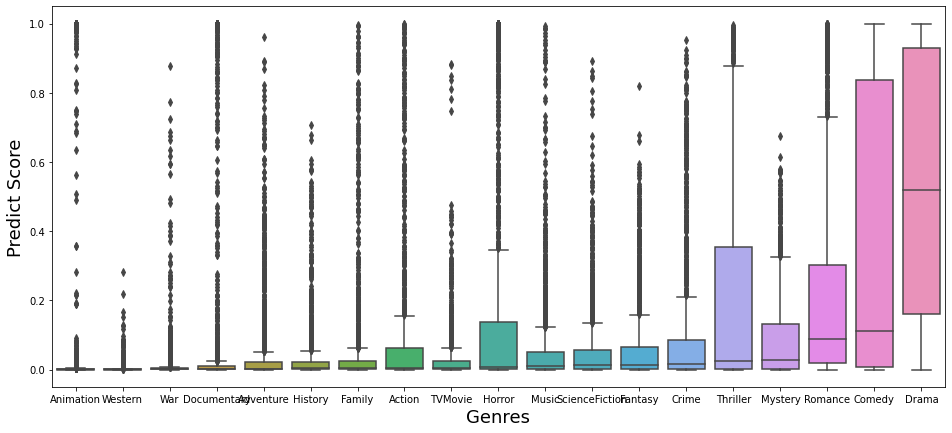

In [ ]:
import seaborn as sns
pt = df_pr
# compute mean per group and find index after sorting
sorted_index = pt.mean().sort_values().index
# compute median per group and find index after sorting
sorted_index = pt.median().sort_values().index
pt_sorted=pt[sorted_index]
# make boxplot with Seaborn's boxplot function
# with data in wide form 
plt.figure(figsize=(16,7))
sns.boxplot(data=pt_sorted)
#sns.stripplot(data=pt_sorted)
# set x-axis label
plt.xlabel("Genres", size=18)
# set y-axis label
plt.ylabel("Predict Score", size=18)

##Distribution Comparision Visulization

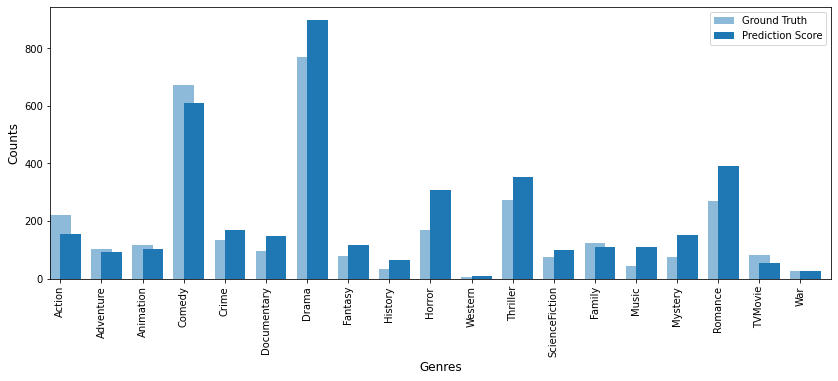

In [ ]:
#distribution
fig, ax = plt.subplots(figsize=(14, 5))
df_gt.sum().plot.bar(ax=ax,alpha=0.5)
df_pr.sum().plot.bar(ax=ax,alpha=1.0,align='edge')
#ax.set_title("Distribution",fontsize=18)
ax.set_xlabel('Genres', fontsize=12)
ax.set_ylabel('Counts', fontsize=12)
ax.legend(['Ground Truth','Prediction Score'])
#ax.xaxis.set_tick_params(rotation=45,labelsize=10) 
plt.show()

##Precision Recall Curve

In [ ]:
def micro_average(y_trues,y_scores):
  # For each class precision recall a_p
  precision = dict()
  recall = dict()
  average_precision = dict()
  for i in range(y_trues.shape[1]):
      precision[i], recall[i], _ = precision_recall_curve(y_trues[:, i],
                                                          y_scores[:, i])
      average_precision[i] = average_precision_score(y_trues[:, i], y_scores[:, i])

  # A "micro-average": quantifying score on all classes jointly
  precision["micro"], recall["micro"], _ = precision_recall_curve(y_trues.ravel(),
      y_scores.ravel())
  average_precision["micro"] = average_precision_score(y_trues, y_scores,
                                                      average="micro")
  print('Average precision score, micro-averaged over all classes: {0:0.2f}'
        .format(average_precision["micro"]))

  plt.figure()
  plt.step(recall['micro'], precision['micro'], where='post')

  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.ylim([0.0, 1.05])
  plt.xlim([0.0, 1.0])
  plt.title(
      'Micro Average Precision: AP={0:0.2f}'
      .format(average_precision["micro"]))

In [ ]:
y_trues = df_gt.values.tolist()
y_scores = df_pr.values.tolist()

In [ ]:
y_trues

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
y_scores

array([[5.4259752e-09, 7.9772448e-08, 1.5740105e-07, ..., 9.9286872e-01,
        2.0449103e-05, 9.7019574e-07],
       [2.8116679e-01, 3.3032709e-01, 9.7203326e-01, ..., 1.9310762e-01,
        1.7367755e-01, 3.8219459e-02],
       [2.3269067e-03, 3.0319765e-04, 3.1749363e-04, ..., 2.2880102e-02,
        3.5354365e-02, 6.3195315e-05],
       ...,
       [2.2735800e-01, 5.0947732e-01, 2.9287459e-02, ..., 9.6398495e-02,
        8.0893889e-02, 1.1039574e-01],
       [1.0927676e-03, 1.2473365e-03, 1.3270479e-04, ..., 8.3131987e-01,
        2.8381622e-03, 3.6422393e-06],
       [1.0413681e-01, 2.3471119e-01, 9.9998963e-01, ..., 2.2115175e-01,
        1.4864114e-03, 4.6923306e-02]], dtype=float32)

Average precision score, micro-averaged over all classes: 0.44


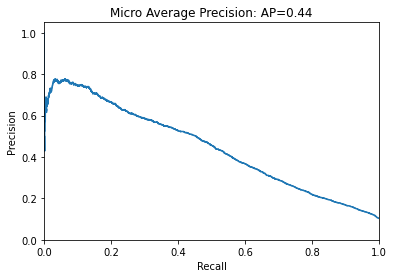

In [ ]:
micro_average(y_trues,y_scores)

In [ ]:
from itertools import cycle
def pr_curves(y_trues,y_scores):
  #PR-curves
  genres = ['Action','Adventure','Animation','Comedy','Crime','Documentary','Drama','Fantasy','History','Horror','Western','Thriller','ScienceFiction','Family','Music','Mystery','Romance','TVMovie','War']
  n_classes = y_trues.shape[1]
  # For each class precision recall a_p
  precision = dict()
  recall = dict()
  average_precision = dict()
  for i in range(y_trues.shape[1]):
      precision[i], recall[i], _ = precision_recall_curve(y_trues[:, i],
                                                          y_scores[:, i])
      average_precision[i] = average_precision_score(y_trues[:, i], y_scores[:, i])

  # A "micro-average": quantifying score on all classes jointly
  precision["micro"], recall["micro"], _ = precision_recall_curve(y_trues.ravel(),
      y_scores.ravel())
  average_precision["micro"] = average_precision_score(y_trues, y_scores,
                                                      average="micro")
  # setup plot details
  colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])

  plt.figure(figsize=(14, 14))
  f_scores = np.linspace(0.2, 0.8, num=4)
  lines = []
  labels = []
  for f_score in f_scores:
      x = np.linspace(0.01, 1)
      y = f_score * x / (2 * x - f_score)
      l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
      plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

  lines.append(l)
  labels.append('iso-f1 curves')
  l, = plt.plot(recall["micro"], precision["micro"], color='gold', lw=2)
  lines.append(l)
  labels.append('AUPRC ({0:0.2f})'
                ''.format(average_precision["micro"]))

  for i, color in zip(range(n_classes), colors):
      l, = plt.plot(recall[i], precision[i], color=color, lw=2)
      lines.append(l)
      labels.append('{0} ({1:0.2f})'
                    ''.format(genres[i], average_precision[i]))

  fig = plt.gcf()
  fig.subplots_adjust(bottom=0.25)
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.title('Precision-Recall curves')
  plt.legend(lines, labels, bbox_to_anchor=(1, 1), prop=dict(size=14))
  plt.show()

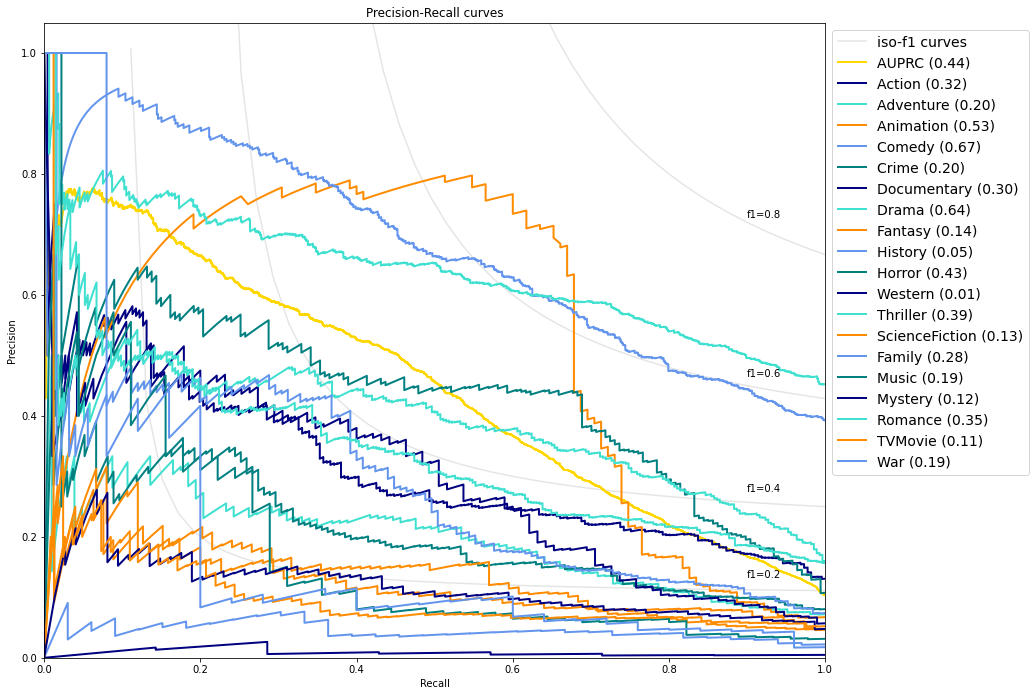

In [ ]:
pr_curves(y_trues,y_scores)

##ROC Curve

In [ ]:
import math
def roc_curves(y_trues,y_scores):
  # Compute ROC curve and ROC area for each class
  genres = ['Action','Adventure','Animation','Comedy','Crime','Documentary','Drama','Fantasy','History','Horror','Western','Thriller','ScienceFiction','Family','Music','Mystery','Romance','TVMovie','War']
  n_classes = y_trues.shape[1]
  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  thresholds = dict()
  for i in range(n_classes):
      fpr[i], tpr[i], thresholds[i] = roc_curve(y_trues[:, i], y_scores[:, i])
      roc_auc[i] = auc(fpr[i], tpr[i])


  # Compute micro-average ROC curve and ROC area
  fpr["micro"], tpr["micro"], thresholds['micro'] = roc_curve(y_trues.ravel(), y_scores.ravel())
  roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
  all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

  # Then interpolate all ROC curves at this points
  mean_tpr = np.zeros_like(all_fpr)
  for i in range(n_classes):
      mean_tpr += interp(all_fpr, fpr[i], tpr[i])

  # Finally average it and compute AUC
  mean_tpr /= n_classes

  fpr["macro"] = all_fpr
  tpr["macro"] = mean_tpr
  roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
  # Plot all ROC curves
  plt.figure(figsize=(14,14))
  plt.plot(fpr["micro"], tpr["micro"],
          label='micro-average ROC curve ({0:0.2f})'
                ''.format(roc_auc["micro"]),
          color='deeppink', linestyle=':', linewidth=4)

  plt.plot(fpr["macro"], tpr["macro"],
          label='macro-average ROC curve ({0:0.2f})'
                ''.format(roc_auc["macro"]),
          color='navy', linestyle=':', linewidth=4)
  colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])
  for i, color in zip(range(n_classes), colors):
      plt.plot(fpr[i], tpr[i], color=color, lw=2,
              label='{0} ({1:0.2f})'
              ''.format(genres[i], roc_auc[i]))

  plt.plot([0, 1], [0, 1], 'k--', lw=2)
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic')
  plt.legend(bbox_to_anchor=(1, 1),prop=dict(size=14))
  plt.show()
  return fpr,tpr,thresholds

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead



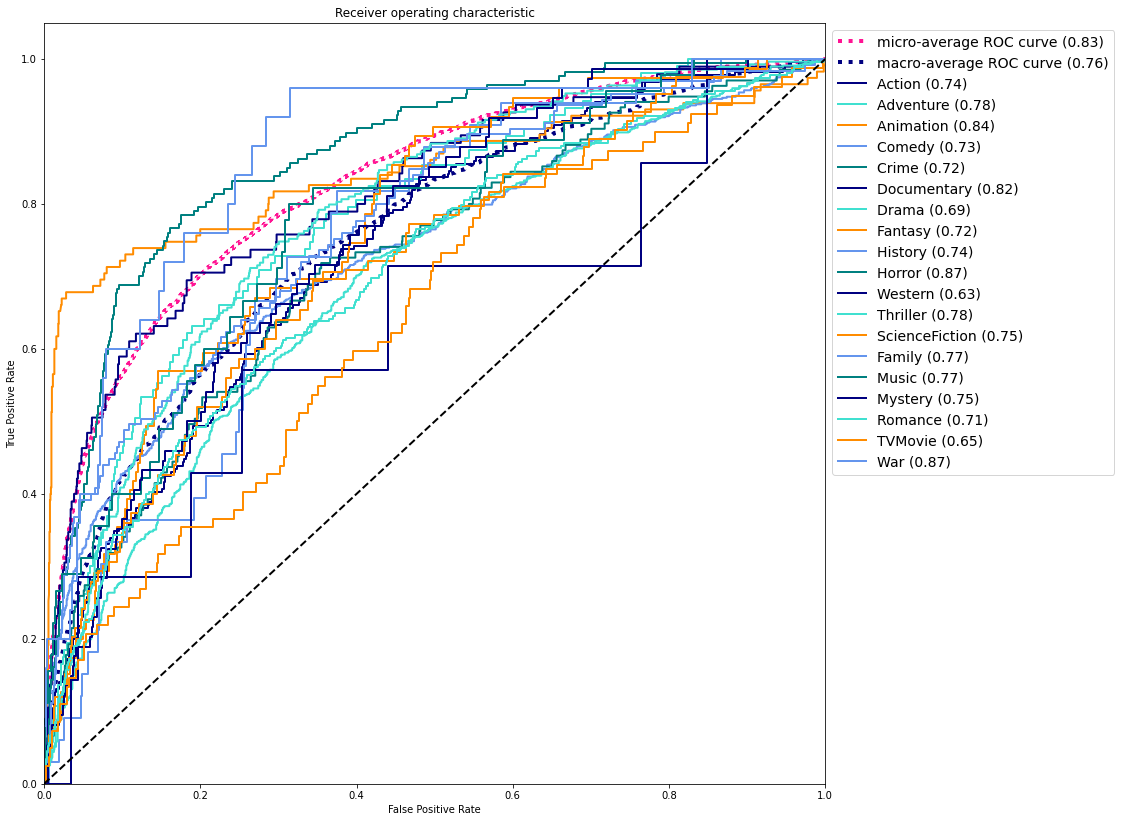

In [ ]:
fpr,tpr,thresholds = roc_curves(y_trues,y_scores)

###Thresholds for Different Genres

In [ ]:
fpr.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 'micro', 'macro'])

In [ ]:
tpr.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 'micro', 'macro'])

In [ ]:
genres = ['Action','Adventure','Animation','Comedy','Crime','Documentary','Drama','Fantasy','History','Horror','Western','Thriller','ScienceFiction','Family','Music','Mystery','Romance','TVMovie','War']
keys = list(thresholds.keys())
best_threshold = {}

for i in range(y_trues.shape[1]):
  tpr[i]
  fpr[i]
  tp = tpr[i]
  fp = fpr[i]
  threshold = thresholds[i]
  gmeans = []
  for j in range(len(tpr[i])):
    means = math.sqrt(tp[j]*(1-fp[j]))
    gmeans.append(means)
  idx = np.argmax(gmeans)
  best = threshold[idx]
  best_threshold[genres[i]] = best

In [ ]:
best_threshold

{'Action': 0.010273532,
 'Adventure': 0.011742403,
 'Animation': 0.05812686,
 'Comedy': 0.3352165,
 'Crime': 0.03576943,
 'Documentary': 0.013984861,
 'Drama': 0.41951522,
 'Family': 0.010428622,
 'Fantasy': 0.05254385,
 'History': 0.0072493474,
 'Horror': 0.16664824,
 'Music': 0.03282981,
 'Mystery': 0.06714626,
 'Romance': 0.16857713,
 'ScienceFiction': 0.018323347,
 'TVMovie': 0.005658301,
 'Thriller': 0.17679335,
 'War': 0.0021173016,
 'Western': 0.0010407814}

In [ ]:
#best threshold of movie genres before normlization
{'Action': 0.2734299334207649,
 'Adventure': 0.1844832144793852,
 'Comedy': 0.3464719427853213,
 'Crime': 0.15445477957246376,
 'Drama': 0.4791394875906651,
 'Family': 0.19580103817232208,
 'Fantasy': 0.13233751793698226,
 'History': 0.11437673584925633,
 'Horror': 0.2184509430336712,
 'Mystery': 0.09502623336102424,
 'Romance': 0.203588093531728,
 'ScienceFiction': 0.0978697556905662,
 'Thriller': 0.2107893895827944,
 'War': 0.050386086152152655,
 'Western': 0.03905254751701594}

 #best threshold after normlization
 {'Action': 0.6643511493214691,
 'Adventure': 0.6982311153067247,
 'Comedy': 0.4445751219147589,
 'Crime': 0.5919132020759101,
 'Drama': 0.5826431425488756,
 'Family': 0.5622460009421029,
 'Fantasy': 0.5215064127680791,
 'History': 0.8479843384810539,
 'Horror': 0.49903298262386453,
 'Mystery': 0.5973975308392359,
 'Romance': 0.603023248605191,
 'ScienceFiction': 0.6463420157995272,
 'Thriller': 0.5047049410901417,
 'War': 0.5445340632458805,
 'Western': 0.9999999999999999}

In [ ]:
#top-6 accuracy
y_real
y_top6
result1 = {}
for i in range(len(y_real)):
  result1[i] = [x for x in y_real[i] if x not in y_top6[i]]

true_count1 = np.zeros(len(y_real))
for i in range(len(y_real)):
  if result1[i] == []:
    true_count1[i]=1
true_count1.sum()

1075.0

In [ ]:
result1

{0: [],
 1: [6],
 2: [],
 3: [1, 13, 17],
 4: [],
 5: [6, 7, 9],
 6: [],
 7: [],
 8: [],
 9: [],
 10: [1],
 11: [],
 12: [],
 13: [],
 14: [],
 15: [],
 16: [],
 17: [9],
 18: [],
 19: [0],
 20: [],
 21: [1],
 22: [4, 14],
 23: [9, 12],
 24: [],
 25: [],
 26: [],
 27: [],
 28: [],
 29: [],
 30: [],
 31: [],
 32: [],
 33: [],
 34: [],
 35: [],
 36: [9],
 37: [],
 38: [6],
 39: [5],
 40: [5],
 41: [],
 42: [],
 43: [18],
 44: [],
 45: [],
 46: [],
 47: [4, 15],
 48: [],
 49: [],
 50: [12],
 51: [0, 1],
 52: [11],
 53: [],
 54: [3],
 55: [],
 56: [17],
 57: [],
 58: [],
 59: [18],
 60: [],
 61: [16],
 62: [2],
 63: [],
 64: [4, 10],
 65: [15],
 66: [17],
 67: [],
 68: [],
 69: [5],
 70: [],
 71: [],
 72: [],
 73: [6, 16, 17],
 74: [],
 75: [],
 76: [13, 17],
 77: [],
 78: [],
 79: [],
 80: [6],
 81: [3],
 82: [],
 83: [],
 84: [10, 17],
 85: [],
 86: [3],
 87: [],
 88: [1],
 89: [],
 90: [0],
 91: [],
 92: [],
 93: [2],
 94: [0, 3, 16],
 95: [],
 96: [3],
 97: [],
 98: [3],
 99: [],
 100:

##Per-genre Analysis with Threshold = 0.5

###Genre Overlaps

####Prediction Results Overlaps

In [ ]:
for i in range(y_preds.shape[0]):
  for j in range(y_preds.shape[1]):
    if y_preds[i,j] > 0.5:
      y_preds[i,j] = 1
    else:
      y_preds[i,j]=0
y_preds

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
df_preds = pd.DataFrame(y_preds,columns=['Action','Adventure','Animation','Comedy','Crime','Documentary','Drama','Fantasy','History','Horror','Western','Thriller','ScienceFiction','Family','Music','Mystery','Romance','TVMovie','War'])

In [ ]:
df_preds

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Fantasy,History,Horror,Western,Thriller,ScienceFiction,Family,Music,Mystery,Romance,TVMovie,War
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1706,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1707,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1708,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1709,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
overlap_p = df_preds.apply(np.sum,axis=1)
df_preds['Count'] = overlap_p
df_preds

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Fantasy,History,Horror,Western,Thriller,ScienceFiction,Family,Music,Mystery,Romance,TVMovie,War,Count
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1706,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1707,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
1708,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1709,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0


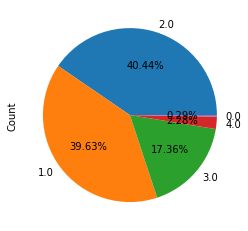

In [ ]:
df_preds.loc[:,'Count'].value_counts().plot(kind ="pie", autopct="%1.2f%%")
plt.show()

####Ground Truth Overlaps

In [ ]:
#ground truth
df_gt

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Fantasy,History,Horror,Western,Thriller,ScienceFiction,Family,Music,Mystery,Romance,TVMovie,War
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1706,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1707,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1708,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1709,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
overlap = df_gt.apply(np.sum,axis=1)
df_gt['Count'] = overlap
df_gt.loc[:,'Count'].value_counts()

1.0    656
2.0    600
3.0    342
4.0     88
5.0     19
6.0      6
Name: Count, dtype: int64

In [ ]:
overlap = df_gt.apply(np.sum,axis=1)
overlap.describe()

count    1711.000000
mean        3.933372
std         1.943711
min         2.000000
25%         2.000000
50%         4.000000
75%         6.000000
max        12.000000
dtype: float64

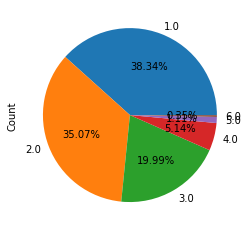

In [ ]:
df_gt.loc[:,'Count'].value_counts().plot(kind ="pie", autopct="%1.2f%%")
plt.show()

###Confusion Matrix

In [ ]:
y_preds = (y_scores > 0.5)
y_preds

array([[False, False, False, ...,  True, False, False],
       [False, False,  True, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False,  True, False, ..., False, False, False],
       [False, False, False, ...,  True, False, False],
       [False, False,  True, ..., False, False, False]])

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import multilabel_confusion_matrix
cm = multilabel_confusion_matrix(y_trues,y_preds)
cm

array([[[1423,   67],
        [ 173,   48]],

       [[1580,   28],
        [  92,   11]],

       [[1567,   29],
        [  44,   71]],

       [[ 832,  207],
        [ 293,  379]],

       [[1496,   80],
        [  99,   36]],

       [[1526,   90],
        [  49,   46]],

       [[ 587,  354],
        [ 256,  514]],

       [[1615,   17],
        [  74,    5]],

       [[1662,   16],
        [  32,    1]],

       [[1376,  168],
        [  52,  115]],

       [[1704,    0],
        [   7,    0]],

       [[1235,  202],
        [ 136,  138]],

       [[1622,   14],
        [  69,    6]],

       [[1539,   47],
        [  88,   37]],

       [[1638,   28],
        [  33,   12]],

       [[1622,   15],
        [  69,    5]],

       [[1246,  197],
        [ 160,  108]],

       [[1624,    5],
        [  80,    2]],

       [[1679,    7],
        [  21,    4]]])

Normalized confusion matrix
[[0.89160401 0.10839599]
 [0.5826087  0.4173913 ]]


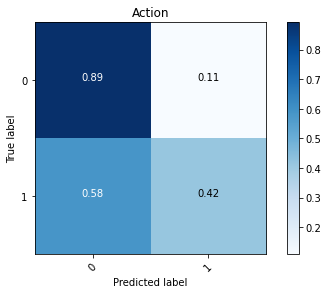

In [ ]:
plot_confusion_matrix(y_preds[:,0], y_trues[:,0], classes=[0,1], normalize=True, title='Action')

###Accuracy

In [ ]:
def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements 
genres=['Action','Adventure','Animation','Comedy','Crime','Documentary','Drama','Fantasy','History','Horror','Western','Thriller','ScienceFiction','Family','Music','Mystery','Romance','TVMovie','War']
acc={}
for i in range(len(cm)):
  acc[genres[i]] = accuracy(cm[i])
acc

{'Action': 0.8597311513734658,
 'Adventure': 0.9298655756867329,
 'Animation': 0.9573348918760959,
 'Comedy': 0.7077732320280538,
 'Crime': 0.8953828170660433,
 'Documentary': 0.9187609585037989,
 'Drama': 0.6434833430742256,
 'Family': 0.9210987726475746,
 'Fantasy': 0.9468147282291058,
 'History': 0.9719462302746932,
 'Horror': 0.8714202220923437,
 'Music': 0.9643483343074225,
 'Mystery': 0.950905902980713,
 'Romance': 0.7913500876680304,
 'ScienceFiction': 0.9514903565166569,
 'TVMovie': 0.9503214494447692,
 'Thriller': 0.8024547048509644,
 'War': 0.983635300993571,
 'Western': 0.9959088252483927}

In [ ]:
average_acc = 0
for i in range(len(cm)):
  average_acc = average_acc + acc[genres[i]]
average_acc = average_acc / (len(cm))
average_acc

0.8954750992032975

###Precision

In [ ]:
def precision(label,confusion_matrix):
    col = confusion_matrix[:, label]
    return confusion_matrix[label, label] / col.sum()

genres=['Action','Adventure','Animation','Comedy','Crime','Documentary','Drama','Fantasy','History','Horror','Western','Thriller','ScienceFiction','Family','Music','Mystery','Romance','TVMovie','War']
prec={}
for i in range(len(cm)):
  prec[genres[i]] = precision(1,cm[i])
prec

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning:

invalid value encountered in long_scalars



{'Action': 0.41739130434782606,
 'Adventure': 0.28205128205128205,
 'Animation': 0.71,
 'Comedy': 0.6467576791808873,
 'Crime': 0.3103448275862069,
 'Documentary': 0.3382352941176471,
 'Drama': 0.5921658986175116,
 'Family': 0.44047619047619047,
 'Fantasy': 0.22727272727272727,
 'History': 0.058823529411764705,
 'Horror': 0.40636042402826855,
 'Music': 0.3,
 'Mystery': 0.25,
 'Romance': 0.3540983606557377,
 'ScienceFiction': 0.3,
 'TVMovie': 0.2857142857142857,
 'Thriller': 0.40588235294117647,
 'War': 0.36363636363636365,
 'Western': nan}

###Recall

In [ ]:
def recall(label, confusion_matrix):
    row = confusion_matrix[label, :]
    return confusion_matrix[label, label] / row.sum()
genres=['Action','Adventure','Animation','Comedy','Crime','Documentary','Drama','Fantasy','History','Horror','Western','Thriller','ScienceFiction','Family','Music','Mystery','Romance','TVMovie','War']
rec={}
for i in range(len(cm)):
  rec[genres[i]] = recall(1,cm[i])
rec

{'Action': 0.2171945701357466,
 'Adventure': 0.10679611650485436,
 'Animation': 0.6173913043478261,
 'Comedy': 0.5639880952380952,
 'Crime': 0.26666666666666666,
 'Documentary': 0.4842105263157895,
 'Drama': 0.6675324675324675,
 'Family': 0.296,
 'Fantasy': 0.06329113924050633,
 'History': 0.030303030303030304,
 'Horror': 0.688622754491018,
 'Music': 0.26666666666666666,
 'Mystery': 0.06756756756756757,
 'Romance': 0.40298507462686567,
 'ScienceFiction': 0.08,
 'TVMovie': 0.024390243902439025,
 'Thriller': 0.5036496350364964,
 'War': 0.16,
 'Western': 0.0}

###F1-Score

In [ ]:
from sklearn.metrics import f1_score
genres=['Action','Adventure','Animation','Comedy','Crime','Documentary','Drama','Fantasy','History','Horror','Western','Thriller','ScienceFiction','Family','Music','Mystery','Romance','TVMovie','War']
f1={}
for i in range(len(cm)):
  f1[genres[i]] = f1_score(y_true[:,i],y_pred[:,i])
f1

{'Action': 0.28571428571428575,
 'Adventure': 0.15492957746478872,
 'Animation': 0.6604651162790698,
 'Comedy': 0.6025437201907791,
 'Crime': 0.28685258964143423,
 'Documentary': 0.3982683982683982,
 'Drama': 0.6275946275946277,
 'Family': 0.354066985645933,
 'Fantasy': 0.099009900990099,
 'History': 0.04,
 'Horror': 0.5111111111111112,
 'Music': 0.2823529411764706,
 'Mystery': 0.10638297872340427,
 'Romance': 0.37696335078534027,
 'ScienceFiction': 0.12631578947368421,
 'TVMovie': 0.0449438202247191,
 'Thriller': 0.44951140065146583,
 'War': 0.2222222222222222,
 'Western': 0.0}

In [ ]:
from sklearn.metrics import f1_score
f1 = f1_score(y_true,y_pred,average='macro')
print('macro',f1)
f1 = f1_score(y_true,y_pred,average='micro')
print('micro',f1)
f1 = f1_score(y_true,y_pred,average='weighted')
print('weighted',f1)

macro 0.2962762534819912
micro 0.4751312944084028
weighted 0.45230692457011934


##Pre-movie Analysis

###Accuracy with Threshold = 0.5

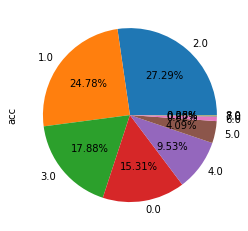

In [ ]:
sum = y_trues - y_preds
sum = np.abs(sum)
df_diff = pd.DataFrame(sum)
accuracy = df_diff.apply(np.sum,axis=1)
df_diff['acc'] = accuracy
df_diff.loc[:,'acc'].value_counts().plot(kind ="pie", autopct="%1.2f%%")
plt.show()

In [ ]:
index = []
index = df_diff[df_diff['acc'] == 0.0].index
correct = df_pt.loc[index]
correct

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Fantasy,History,Horror,Western,Thriller,ScienceFiction,Family,Music,Mystery,Romance,TVMovie,War,Count
6,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.020423
9,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.167763
12,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.553453
18,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.450016
29,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.192023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1682,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.156418
1689,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.497158
1692,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.126265
1693,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.488294


In [ ]:
correct.sum()

Action              6.000000
Adventure           2.000000
Animation           9.000000
Comedy            113.000000
Crime               3.000000
Documentary        28.000000
Drama             108.000000
Fantasy             2.000000
History             0.000000
Horror             20.000000
Western             0.000000
Thriller           14.000000
ScienceFiction      0.000000
Family              8.000000
Music               6.000000
Mystery             0.000000
Romance            35.000000
TVMovie             0.000000
War                 1.000000
Count             480.152515
dtype: float64

In [ ]:
df_1_error = df_pt.loc[index]
df_1_error.sum()

In [ ]:
df_2_error = df_pt.loc[index]
df_2_error.sum()

In [ ]:
df_3_error = df_pt.loc[index]
df_3_error.sum()

In [ ]:
df_diff.loc[:,'acc'].value_counts()

2.0    467
1.0    424
3.0    306
0.0    262
4.0    163
5.0     70
6.0     14
7.0      4
8.0      1
Name: acc, dtype: int64

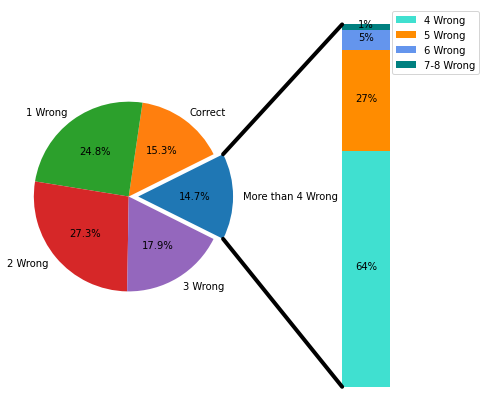

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import numpy as np

# make figure and assign axis objects
fig = plt.figure(figsize=(8.5, 7))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
fig.subplots_adjust(wspace=0)

# pie chart parameters
ratios = [0.1472, .1531, .2478, .2729,.1788]
labels = ['More than 4 Wrong','Correct', '1 Wrong', '2 Wrong','3 Wrong']
explode = [0.1, 0, 0,0,0]
# rotate so that first wedge is split by the x-axis
angle = -180 * ratios[0]
ax1.pie(ratios, autopct='%1.1f%%', startangle=angle,
        labels=labels, explode=explode)

# bar chart parameters
xpos = 0
bottom = 0
ratios = [.6468, .2777, .0555, .0159]
width = .2
colors = ['turquoise', 'darkorange', 'cornflowerblue', 'teal']

for j in range(len(ratios)):
    height = ratios[j]
    ax2.bar(xpos, height, width, bottom=bottom, color=colors[j])
    ypos = bottom + ax2.patches[j].get_height() / 2
    bottom += height
    ax2.text(xpos, ypos, "%d%%" % (ax2.patches[j].get_height() * 100),
             ha='center')

#ax2.set_title('Errors')
ax2.legend(('4 Wrong','5 Wrong', '6 Wrong', '7-8 Wrong'))
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
# get the wedge data
theta1, theta2 = ax1.patches[0].theta1, ax1.patches[0].theta2
center, r = ax1.patches[0].center, ax1.patches[0].r
bar_height = np.sum([item.get_height() for item in ax2.patches])

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(- width / 2, bar_height), xyB=(x, y),
                      coordsA="data", coordsB="data", axesA=ax2, axesB=ax1)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(- width / 2, 0), xyB=(x, y), coordsA="data",
                      coordsB="data", axesA=ax2, axesB=ax1)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)

plt.show()

###Top-6 Accuracy

In [ ]:
y_scores = np.array(df_pt)
y_trues = np.array(df_gt)
y_scores.shape

(1711, 19)

In [ ]:
y_real = []
for i in range(y_trues.shape[0]):
  true = y_trues[i]
  real = []
  for j in range(len(true)):
    if true[j] == 1:
      real.append(j)
  real = np.array(real)
  y_real.append(real)
y_real

[array([3]),
 array([6, 7]),
 array([3]),
 array([ 0,  1, 13, 17]),
 array([3, 9]),
 array([6, 7, 9]),
 array([0, 3, 4]),
 array([3, 6]),
 array([3]),
 array([6]),
 array([1, 2]),
 array([6]),
 array([6]),
 array([3]),
 array([ 9, 11]),
 array([ 9, 11, 15]),
 array([9]),
 array([ 9, 11, 15]),
 array([6]),
 array([0]),
 array([ 6, 16]),
 array([1]),
 array([ 4,  6,  9, 14]),
 array([ 9, 11, 12]),
 array([ 4, 11]),
 array([ 6, 11]),
 array([ 6, 11]),
 array([6]),
 array([ 6, 16]),
 array([ 5, 14]),
 array([9]),
 array([6]),
 array([0, 3, 4]),
 array([ 3, 16]),
 array([6]),
 array([ 0,  4, 11]),
 array([ 9, 15]),
 array([3]),
 array([0, 6]),
 array([5]),
 array([5, 6]),
 array([3]),
 array([6]),
 array([ 0, 11, 12, 18]),
 array([ 4, 11]),
 array([6]),
 array([3]),
 array([ 1,  2,  4, 15]),
 array([9]),
 array([ 2, 12, 17]),
 array([ 3, 12]),
 array([ 0,  1,  6, 11]),
 array([11]),
 array([6, 7]),
 array([ 3,  6, 16]),
 array([3]),
 array([13, 17]),
 array([3]),
 array([3, 9]),
 array([11,

In [ ]:
y_top6 = []
k =6
for i in range(y_scores.shape[0]):
  index = np.argsort(y_scores[i])
  index_sorted = index[::-1]
  idx = index_sorted[:k]
  y_top6.append(idx)
y_top6

[array([ 6, 16,  3, 14,  7, 13]),
 array([ 2,  3,  7, 13, 12,  1]),
 array([ 3,  5, 14, 17, 16,  6]),
 array([ 3,  9, 14,  6,  0, 12]),
 array([ 6,  0, 11,  9, 12,  3]),
 array([ 5, 14,  8, 13, 17,  3]),
 array([ 3,  0,  4, 11,  6, 15]),
 array([ 3, 16,  6,  7, 14, 13]),
 array([ 6, 16,  3, 14, 15, 12]),
 array([ 6,  8, 11, 15,  4, 16]),
 array([ 9, 11,  2, 12, 15,  7]),
 array([ 3,  6,  4, 16, 14,  0]),
 array([ 6, 16,  3,  7, 15, 13]),
 array([ 3, 16,  6, 14,  7, 13]),
 array([ 9,  6, 11, 15,  7, 16]),
 array([ 9, 11, 15,  6,  4,  7]),
 array([ 2,  9, 11, 15,  6,  7]),
 array([ 6, 16, 15,  7, 12, 11]),
 array([ 6, 16, 15, 12,  7, 14]),
 array([ 6, 11, 15, 16, 12,  9]),
 array([ 3, 13,  6,  1,  7, 16]),
 array([ 0, 11,  9, 12,  4,  6]),
 array([ 9, 11,  6, 15,  7, 16]),
 array([ 3,  6,  4, 11,  0, 16]),
 array([ 0, 11,  4,  6, 15,  1]),
 array([ 6, 16, 15, 11, 12,  7]),
 array([11,  4,  6, 15,  9,  0]),
 array([ 2,  6, 18,  8, 16,  1]),
 array([ 6,  3, 11, 16,  4, 15]),
 array([ 5, 14

In [ ]:
#top-6 accuracy
y_real
y_top6
result6 = {}
for i in range(len(y_real)):
  result6[i] = [x for x in y_real[i] if x not in y_top6[i]]

true_count6 = np.zeros(len(y_real))
for i in range(len(y_real)):
  if result6[i] == []:
    true_count6[i]=1
true_count6.sum()

#78 Movie Dataset Genre Analysis

###Load Ground Truth and Prediction Results

In [ ]:
gt_path = '/content/drive/MyDrive/MasterThesisProject/04_Models/CNN-based_Visual_Model/Testing_Dataset/78_movie/78_movie_ground_truth_genre.csv'
gt = pd.read_csv(gt_path)
gt = gt.drop(columns=['Unnamed: 0','video_key'])
gt.sum()

Action            19.0
Adventure         15.0
Comedy            23.0
Crime             12.0
Drama             35.0
Fantasy           10.0
History            2.0
Horror            12.0
Western            1.0
Thriller          29.0
ScienceFiction    17.0
Family             4.0
Mystery            8.0
Romance           12.0
War                2.0
dtype: float64

In [ ]:
gt

,Action,Adventure,Comedy,Crime,Drama,Fantasy,History,Horror,Western,Thriller,ScienceFiction,Family,Mystery,Romance,War
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
74,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
75,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
76,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [ ]:
pt_path = '/content/drive/MyDrive/MasterThesisProject/04_Models/CNN-based_Visual_Model/Testing_Dataset/78_movie/78_movie_predict_genre.csv'
pt = pd.read_csv(pt_path)
pt = pt.drop(columns=['Unnamed: 0.1','Animation','Documentary','Music','TVMovie'])
pt

,Action,Adventure,Comedy,Crime,Drama,Fantasy,History,Horror,Western,Thriller,ScienceFiction,Family,Mystery,Romance,War
0,0.247113,0.237985,0.401393,0.091390,0.409455,0.179648,0.074483,0.109776,0.021065,0.117468,0.081423,0.288844,0.068347,0.157372,0.045922
1,0.250544,0.131378,0.277974,0.156091,0.500148,0.093946,0.095955,0.170613,0.014253,0.244549,0.097870,0.103521,0.083595,0.137629,0.055075
2,0.208550,0.137817,0.318484,0.136901,0.535979,0.108518,0.075764,0.145907,0.011055,0.206241,0.062623,0.144128,0.089893,0.185801,0.037458
3,0.273430,0.196972,0.325313,0.126471,0.525915,0.134995,0.108878,0.102994,0.025822,0.156812,0.064967,0.187262,0.063445,0.207927,0.057556
4,0.281917,0.190991,0.267590,0.126271,0.448743,0.125214,0.094199,0.178240,0.018529,0.223250,0.112146,0.158953,0.088338,0.139112,0.060972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,0.202376,0.100896,0.419421,0.120267,0.437786,0.048684,0.051938,0.141375,0.006083,0.163870,0.060962,0.123157,0.041076,0.218028,0.022303
74,0.246929,0.076922,0.367847,0.165871,0.408480,0.044611,0.042234,0.194216,0.004226,0.236436,0.070249,0.076297,0.051402,0.187041,0.022254
75,0.273364,0.153318,0.283990,0.092436,0.360962,0.078271,0.046402,0.238286,0.006215,0.218852,0.127336,0.140170,0.051398,0.160562,0.029346
76,0.186507,0.092227,0.403323,0.156774,0.411141,0.046277,0.049661,0.127889,0.002735,0.167486,0.046680,0.113183,0.050631,0.175605,0.021920


##Distribution Comparision Visualization

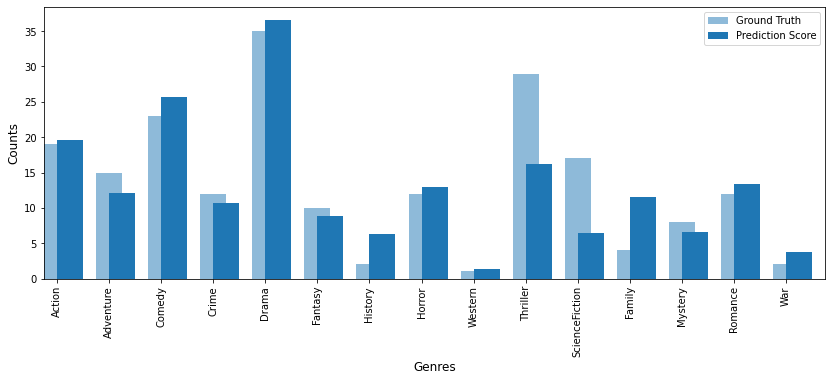

In [ ]:
#distribution
fig, ax = plt.subplots(figsize=(14, 5))
gt.sum().plot.bar(ax=ax,alpha=0.5)
pt.sum().plot.bar(ax=ax,alpha=1.0,align='edge')
#ax.set_title("Distribution",fontsize=18)
ax.set_xlabel('Genres', fontsize=12)
ax.set_ylabel('Counts', fontsize=12)
ax.legend(['Ground Truth','Prediction Score'])
#ax.xaxis.set_tick_params(rotation=45,labelsize=10) 
plt.show()

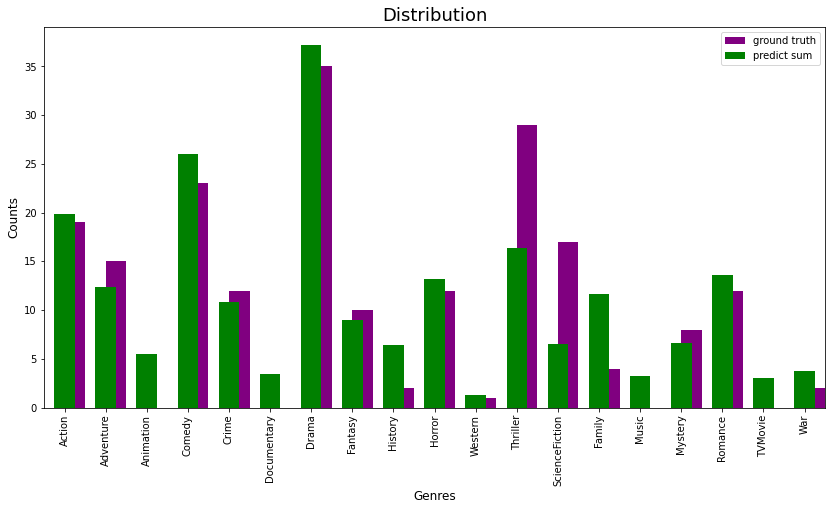

In [ ]:
#distribution
fig, ax = plt.subplots(figsize=(14, 7))
gt.sum().plot.bar(ax=ax,color='purple',align='edge')
pt.sum().plot.bar(ax=ax,color='green')
ax.set_title("Distribution",fontsize=18)
ax.set_xlabel('Genres', fontsize=12)
ax.set_ylabel('Counts', fontsize=12)
ax.legend(['ground truth','predict sum'])
#ax.xaxis.set_tick_params(rotation=45,labelsize=10) 
plt.show()

##Prediction Result Boxplot

Text(0, 0.5, 'Predict Average')

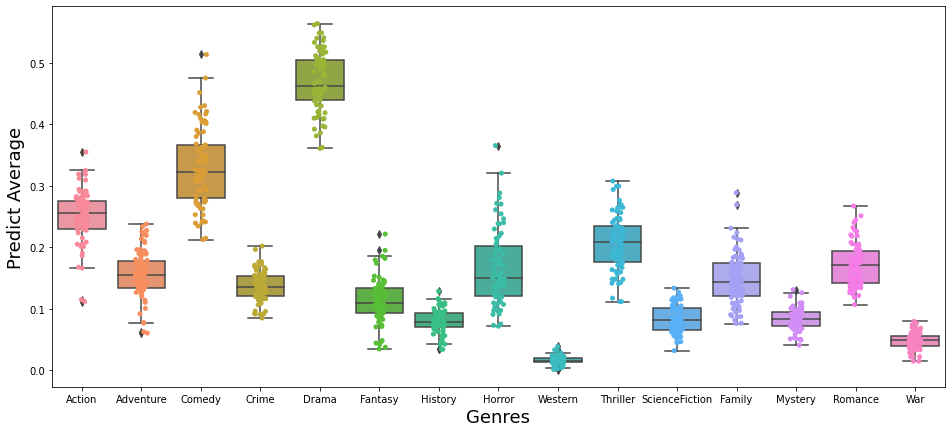

In [ ]:
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# compute mean per group and find index after sorting
sorted_index = pt.mean().sort_values().index
# compute median per group and find index after sorting
sorted_index = pt.median().sort_values().index
pt_sorted=pt[sorted_index]
# make boxplot with Seaborn's boxplot function
# with data in wide form 
plt.figure(figsize=(16,7))
sns.boxplot(data=pt)
sns.stripplot(data=pt)
# set x-axis label
plt.xlabel("Genres", size=18)
# set y-axis label
plt.ylabel("Predict Average", size=18)

##Boxplot after Normalization

In [ ]:
#Normalization
scaler = MinMaxScaler()
pt_norm = scaler.fit(pt)
pt_norm = scaler.transform(pt)
pt_norm

Text(0, 0.5, 'Predict')

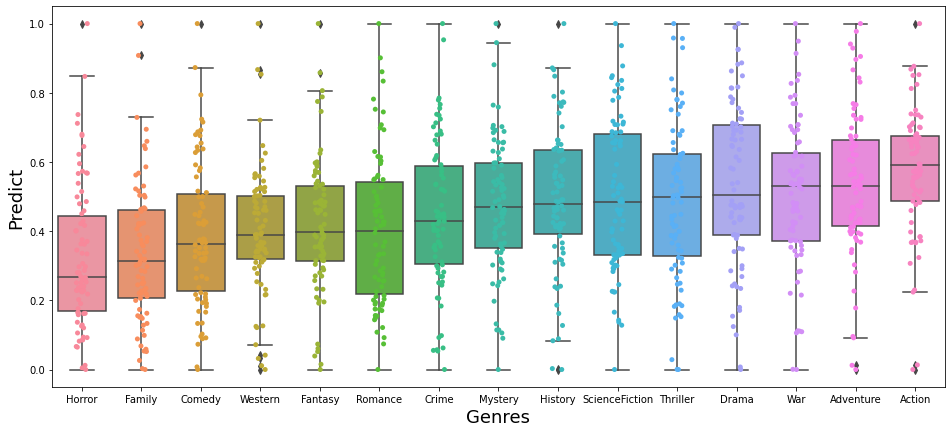

In [ ]:
# compute mean per group and find index after sorting
sorted_index = pt_norm.mean().sort_values().index
# compute median per group and find index after sorting
sorted_index = pt_norm.median().sort_values().index
#Normalization
pt_norm_sorted=pt_norm[sorted_index]
# make boxplot with Seaborn's boxplot function
# with data in wide form 
plt.figure(figsize=(16,7))
sns.boxplot(data=pt_norm_sorted)
sns.stripplot(data=pt_norm_sorted)
# set x-axis label
plt.xlabel("Genres", size=18)
# set y-axis label
plt.ylabel("Predict", size=18)

Text(0.5, 1.0, 'Boxplots')

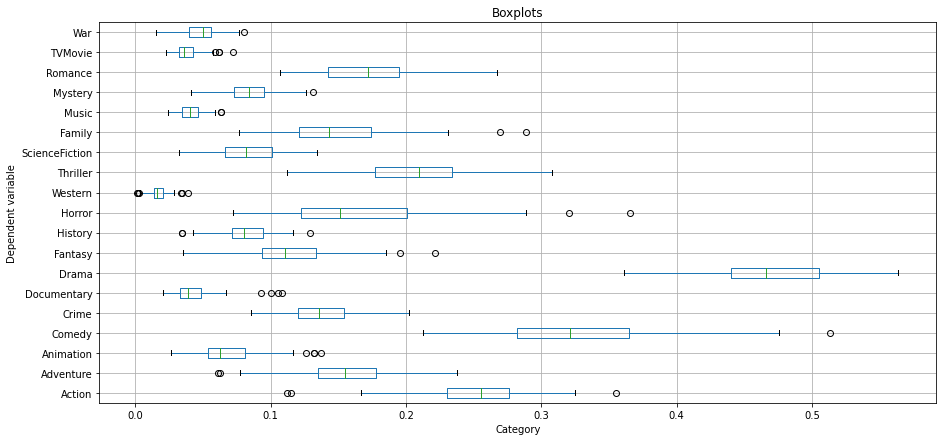

In [ ]:
plt.figure(figsize=(15,7))
bp = pt.boxplot(vert=False)
plt.xlabel('Category')
plt.ylabel('Dependent variable')
plt.title('Boxplots')

##Precision Recall Curve

In [ ]:
y_trues = gt.values.tolist()
y_scores = pt.values.tolist()
y_trues = np.array(y_trues)
y_scores = np.array(pt_norm)
y_scores.shape

(78, 15)

Average precision score, micro-averaged over all classes: 0.54


Text(0.5, 1.0, 'Micro-averaged over all classes: AP=0.54')

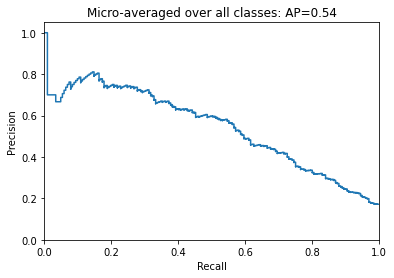

In [ ]:
# For each class precision recall a_p
precision = dict()
recall = dict()
average_precision = dict()
for i in range(y_trues.shape[1]):
    precision[i], recall[i], _ = precision_recall_curve(y_trues[:, i],
                                                        y_scores[:, i])
    average_precision[i] = average_precision_score(y_trues[:, i], y_scores[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(y_trues.ravel(),
    y_scores.ravel())
average_precision["micro"] = average_precision_score(y_trues, y_scores,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

plt.figure()
plt.step(recall['micro'], precision['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["micro"]))

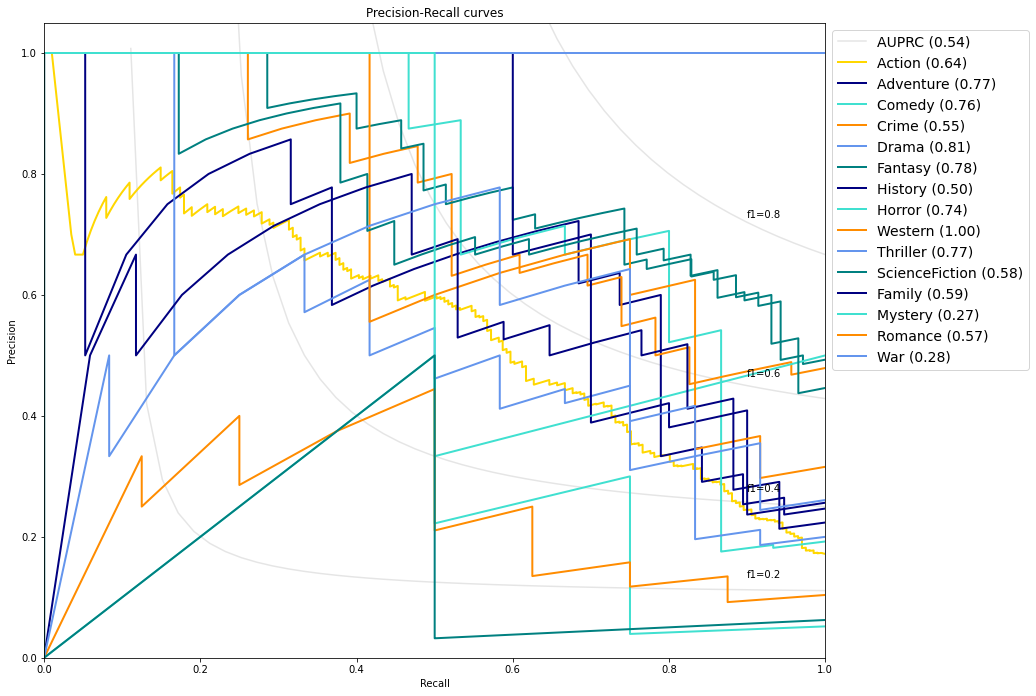

In [ ]:
#PR-curves
genres = ['Action','Adventure','Comedy','Crime','Drama','Fantasy','History','Horror','Western','Thriller','ScienceFiction','Family','Mystery','Romance','War']
from itertools import cycle
n_classes = y_trues.shape[1]
# setup plot details
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])

plt.figure(figsize=(14, 14))
f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

lines.append(l)
#labels.append('iso-f1 curves')
l, = plt.plot(recall["micro"], precision["micro"], color='gold', lw=2)
lines.append(l)
labels.append('AUPRC ({0:0.2f})'
              ''.format(average_precision["micro"]))

for i, color in zip(range(n_classes), colors):
    l, = plt.plot(recall[i], precision[i], color=color, lw=2)
    lines.append(l)
    labels.append('{0} ({1:0.2f})'
                  ''.format(genres[i], average_precision[i]))

fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curves')
plt.legend(lines, labels, bbox_to_anchor=(1, 1), prop=dict(size=14))
plt.show()

###Thresholds for Different Genres

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead



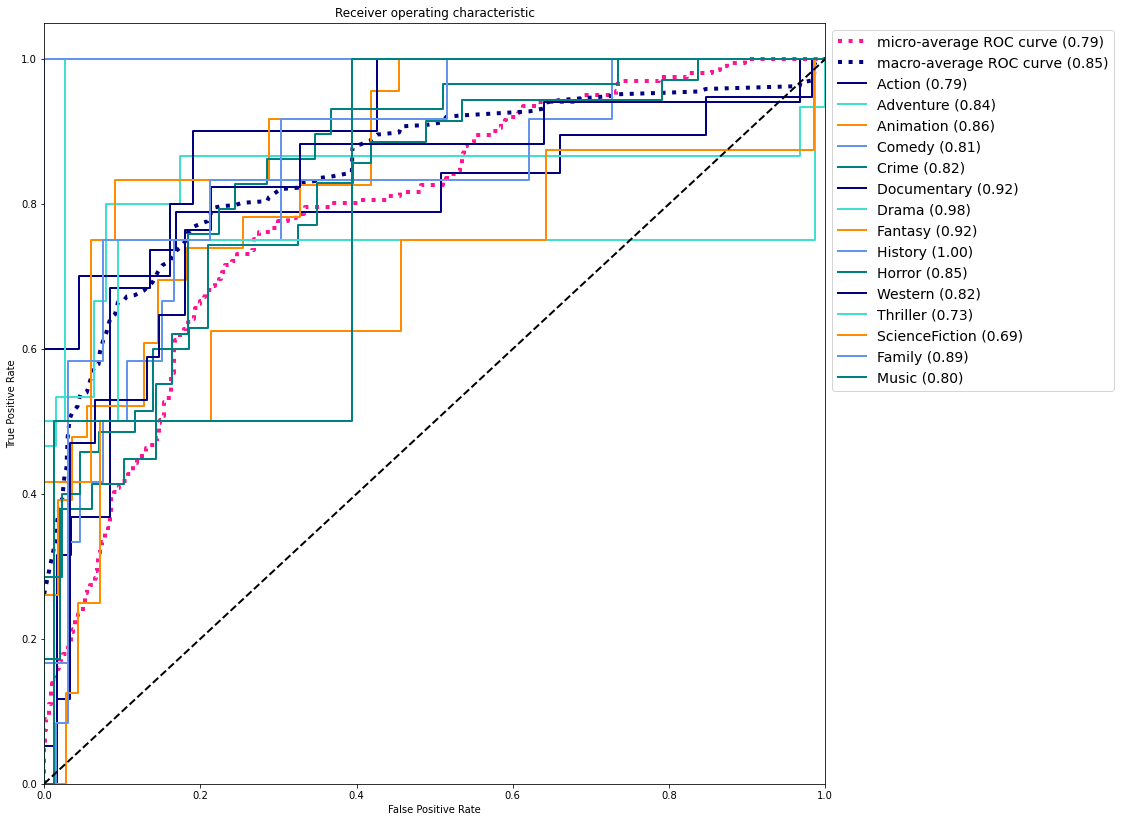

In [ ]:
#compute the best thershold
fpr,tpr,thresholds = roc_curves(y_trues,y_scores)
fpr.keys()
genres = ['Action','Adventure','Comedy','Crime','Drama','Fantasy','History','Horror','Western','Thriller','ScienceFiction','Family','Mystery','Romance','War']
keys = list(thresholds.keys())
best_threshold = {}

for i in range(y_trues.shape[1]):
  tpr[i]
  fpr[i]
  tp = tpr[i]
  fp = fpr[i]
  threshold = thresholds[i]
  gmeans = []
  for j in range(len(tpr[i])):
    means = math.sqrt(tp[j]*(1-fp[j]))
    gmeans.append(means)
  idx = np.argmax(gmeans)
  best = threshold[idx]
  best_threshold[genres[i]] = best

In [ ]:
best_threshold

{'Action': 0.2734299334207649,
 'Adventure': 0.1844832144793852,
 'Comedy': 0.3464719427853213,
 'Crime': 0.15445477957246376,
 'Drama': 0.4791394875906651,
 'Family': 0.19580103817232208,
 'Fantasy': 0.13233751793698226,
 'History': 0.11437673584925633,
 'Horror': 0.2184509430336712,
 'Mystery': 0.09502623336102424,
 'Romance': 0.203588093531728,
 'ScienceFiction': 0.0978697556905662,
 'Thriller': 0.2107893895827944,
 'War': 0.050386086152152655,
 'Western': 0.03905254751701594}

In [ ]:
best_threshold

{'Action': 0.6643511493214691,
 'Adventure': 0.6982311153067247,
 'Comedy': 0.4445751219147589,
 'Crime': 0.5919132020759101,
 'Drama': 0.5826431425488756,
 'Family': 0.5622460009421029,
 'Fantasy': 0.5215064127680791,
 'History': 0.8479843384810539,
 'Horror': 0.49903298262386453,
 'Mystery': 0.5973975308392359,
 'Romance': 0.603023248605191,
 'ScienceFiction': 0.6463420157995272,
 'Thriller': 0.5047049410901417,
 'War': 0.5445340632458805,
 'Western': 0.9999999999999999}

##ROC Curve

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead



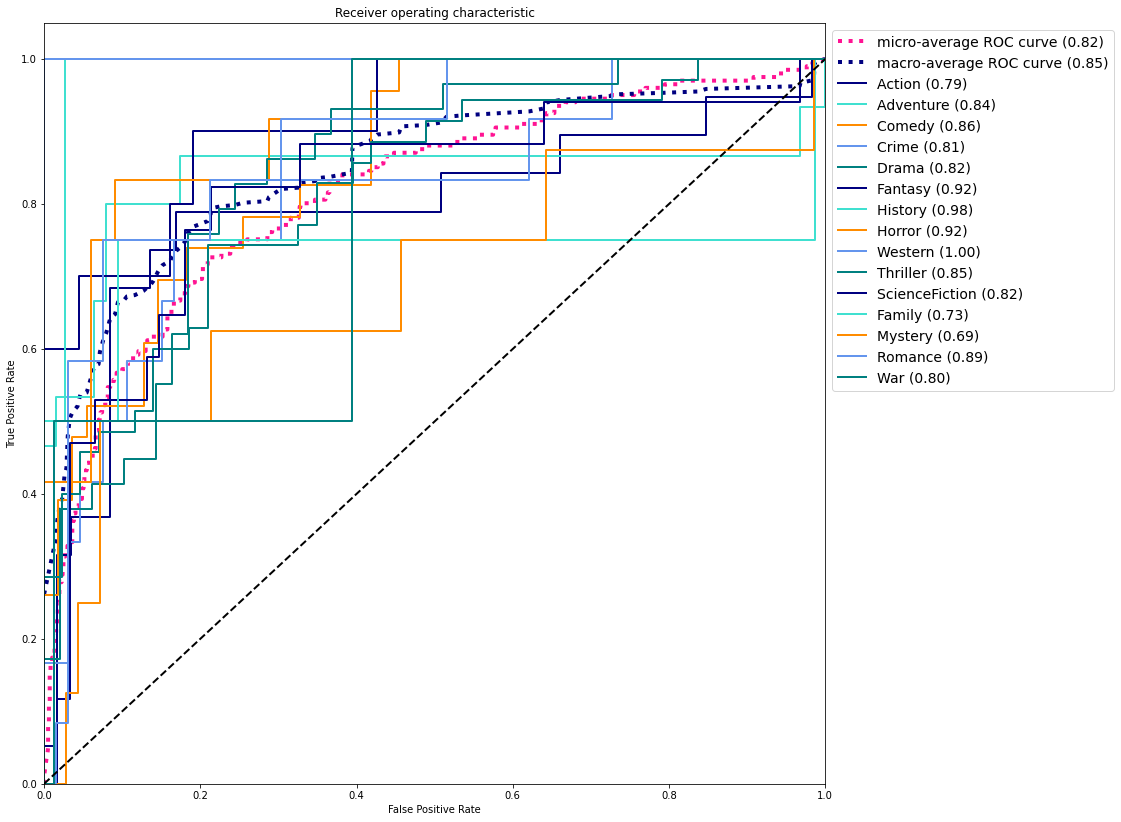

In [ ]:
# Compute ROC curve and ROC area for each class
genres = ['Action','Adventure','Comedy','Crime','Drama','Fantasy','History','Horror','Western','Thriller','ScienceFiction','Family','Mystery','Romance','War']
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(y_trues.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_trues[:, i], y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_trues.ravel(), y_scores.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(14,14))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve ({0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve ({0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='{0} ({1:0.2f})'
             ''.format(genres[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(bbox_to_anchor=(1, 1),prop=dict(size=14))
plt.show()

##Pre-genre Analysis

###Ground Truth Overlaps

In [ ]:
overlap = gt.apply(np.sum,axis=1)
overlap

0     3.0
1     2.0
2     1.0
3     3.0
4     4.0
     ... 
73    2.0
74    3.0
75    3.0
76    6.0
77    2.0
Length: 78, dtype: float64

In [ ]:
gt['Count'] = overlap
gt

,Action,Adventure,Comedy,Crime,Drama,Fantasy,History,Horror,Western,Thriller,ScienceFiction,Family,Mystery,Romance,War,Count
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
74,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0
75,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0
76,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,6.0


In [ ]:
index3 = gt[gt['Count']==6].index
index3

Int64Index([76], dtype='int64')

In [ ]:
gt.loc[:,'Count'].value_counts()

3.0    24
2.0    23
1.0    15
4.0    13
5.0     2
6.0     1
Name: Count, dtype: int64

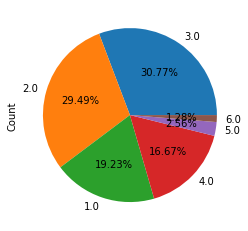

In [ ]:
gt.loc[:,'Count'].value_counts().plot(kind ="pie", autopct="%1.2f%%")
plt.show()

##Pre-movie Analysis

###Top-6 Accuracy

In [ ]:
y_scores

array([[0.55610066, 1.        , 0.62714771, ..., 0.30197167, 0.31454514,
        0.47574765],
       [0.57021371, 0.39869969, 0.21687102, ..., 0.47081197, 0.19131679,
        0.61678447],
       [0.39747599, 0.43501494, 0.35153636, ..., 0.54055744, 0.4919957 ,
        0.34532429],
       ...,
       [0.6640784 , 0.5224493 , 0.23686877, ..., 0.11429618, 0.33446197,
        0.22034344],
       [0.3068039 , 0.17787022, 0.63356379, ..., 0.10579688, 0.42835434,
        0.10590464],
       [0.01330501, 0.        , 0.55681393, ..., 0.19739119, 0.55089149,
        0.        ]])

In [ ]:
y_top6 = []
k =6
for i in range(y_scores.shape[0]):
  index = np.argsort(y_scores[i])
  index_sorted = index[::-1]
  idx = index_sorted[:k]
  y_top6.append(idx)
y_top6

[array([11,  1,  5,  2,  0,  8]),
 array([ 4,  9,  6, 10, 14,  3]),
 array([ 4, 12, 13,  9,  3,  6]),
 array([ 4,  6,  1,  0, 14,  8]),
 array([10,  1, 14,  0,  6,  9]),
 array([ 4,  1, 13, 14,  2, 11]),
 array([ 4, 12,  9, 14,  1,  3]),
 array([ 4, 13, 14,  6,  1,  0]),
 array([ 6, 14,  0,  4,  1,  9]),
 array([ 7,  9, 10,  0,  5, 12]),
 array([ 0, 10,  1,  9,  3,  5]),
 array([10,  7,  5,  0,  1,  9]),
 array([ 4, 14, 12,  6,  3,  9]),
 array([ 4,  6, 14,  0,  1,  8]),
 array([ 9, 10,  0, 12,  7, 14]),
 array([ 8,  1, 14,  6,  0,  5]),
 array([ 1,  5,  0, 10,  6, 14]),
 array([ 1, 10,  0,  6, 14,  9]),
 array([ 9,  3,  0, 12, 14, 10]),
 array([10,  9, 12,  0,  7, 13]),
 array([ 3,  0,  4,  2,  6, 14]),
 array([10,  9,  3, 12,  0, 14]),
 array([ 2, 13, 11,  1,  4,  8]),
 array([ 4, 13,  3,  6, 14, 12]),
 array([ 0, 10,  9,  7, 14,  6]),
 array([14,  4,  6,  3,  8,  2]),
 array([ 0,  1, 14, 10,  6,  9]),
 array([ 4, 13,  6,  8,  2,  3]),
 array([10, 11,  1,  0,  5,  2]),
 array([ 0, 10

In [ ]:
y_real = []
for i in range(len(y_trues)):
  true = y_trues[i]
  real = []
  for j in range(len(true)):
    if true[j] == 1:
      real.append(j)
  real = np.array(real)
  y_real.append(real)
y_real

[array([ 1,  5, 11]),
 array([ 4, 10]),
 array([4]),
 array([0, 2, 5]),
 array([ 0,  1,  9, 10]),
 array([2, 4]),
 array([4]),
 array([ 4, 13]),
 array([0, 4, 9]),
 array([ 0,  5,  7,  9, 10]),
 array([ 0,  9, 10]),
 array([7]),
 array([ 4, 13]),
 array([4]),
 array([4, 9]),
 array([1, 4, 8]),
 array([0, 1, 5]),
 array([ 4,  9, 10]),
 array([ 9, 12]),
 array([2, 7]),
 array([0, 2, 3]),
 array([ 9, 10, 12]),
 array([ 2, 13]),
 array([4]),
 array([0, 7, 9]),
 array([3, 4]),
 array([ 0,  1,  7, 10]),
 array([4]),
 array([0, 1, 2, 3, 9]),
 array([ 0,  1,  2, 10]),
 array([4]),
 array([2]),
 array([2, 3]),
 array([ 2,  4, 13]),
 array([ 2, 13]),
 array([ 0,  4,  9, 14]),
 array([4, 6, 7, 9]),
 array([ 4,  7,  9, 12]),
 array([9]),
 array([ 4, 13]),
 array([0, 3, 9]),
 array([2]),
 array([4, 9]),
 array([2]),
 array([1, 5]),
 array([ 0,  9, 10]),
 array([4]),
 array([ 0,  1,  5, 10]),
 array([ 2, 11]),
 array([ 7, 12]),
 array([3, 4, 9]),
 array([ 2,  4, 11, 13]),
 array([7, 9]),
 array([1, 

In [ ]:
#top-6 accuracy
y_real
y_top6
result6 = {}
for i in range(len(y_real)):
  result6[i] = [x for x in y_real[i] if x not in y_top6[i]]

true_count6 = np.zeros(len(y_real))
for i in range(len(y_real)):
  if result6[i] == []:
    true_count6[i]=1
true_count6.sum()

54.0

In [ ]:
result6

{0: [],
 1: [],
 2: [],
 3: [2, 5],
 4: [],
 5: [],
 6: [],
 7: [],
 8: [],
 9: [],
 10: [],
 11: [],
 12: [13],
 13: [],
 14: [4],
 15: [4],
 16: [],
 17: [4],
 18: [],
 19: [2],
 20: [],
 21: [],
 22: [],
 23: [],
 24: [],
 25: [],
 26: [7],
 27: [],
 28: [3, 9],
 29: [],
 30: [],
 31: [],
 32: [2],
 33: [],
 34: [],
 35: [4, 9, 14],
 36: [7, 9],
 37: [4],
 38: [],
 39: [],
 40: [],
 41: [],
 42: [],
 43: [],
 44: [],
 45: [9],
 46: [],
 47: [5],
 48: [2],
 49: [7],
 50: [],
 51: [],
 52: [],
 53: [],
 54: [],
 55: [],
 56: [],
 57: [],
 58: [],
 59: [],
 60: [],
 61: [],
 62: [],
 63: [],
 64: [9, 10],
 65: [2, 5],
 66: [12],
 67: [2, 7],
 68: [],
 69: [2, 4, 13],
 70: [],
 71: [],
 72: [1],
 73: [],
 74: [],
 75: [],
 76: [1, 11, 12],
 77: [10]}

###Examples

In [ ]:
mis_index = [77,76,72,69,67,66,65,64,49,48,47,45,37,36,35,32,28,26,19,17,15,14,12,3]
for i in mis_index:
  print(i)
  print('the ground genres',gt.loc[i])
  print('the predicted genres',pt_norm.loc[i])

77
the ground genres Action            0.0
Adventure         0.0
Comedy            0.0
Crime             0.0
Drama             0.0
Fantasy           0.0
History           0.0
Horror            0.0
Western           0.0
Thriller          1.0
ScienceFiction    1.0
Family            0.0
Mystery           0.0
Romance           0.0
War               0.0
Name: 77, dtype: float64
the predicted genres Action            0.013305
Adventure         0.000000
Comedy            0.556814
Crime             0.268979
Drama             0.438950
Fantasy           0.015108
History           0.002744
Horror            0.458807
Western           0.011018
Thriller          0.448644
ScienceFiction    0.000000
Family            0.133149
Mystery           0.197391
Romance           0.550891
War               0.000000
Name: 77, dtype: float64
76
the ground genres Action            1.0
Adventure         1.0
Comedy            1.0
Crime             1.0
Drama             0.0
Fantasy           0.0
History           0.

In [ ]:
# Rush hour
index = pt[pt['Unnamed: 0.1'] == 'SCTzYY95Aw4'].index[0]
print(pt_norm.loc[index])
print(gt.loc[index])

Action            0.700758
Adventure         0.391307
Comedy            0.678865
Crime             0.766296
Drama             0.690762
Fantasy           0.270143
History           0.601861
Horror            0.081969
Western           0.526645
Thriller          0.389171
ScienceFiction    0.291393
Family            0.285791
Mystery           0.262014
Romance           0.548439
War               0.550670
Name: 20, dtype: float64
Action            1.0
Adventure         0.0
Comedy            1.0
Crime             1.0
Drama             0.0
Fantasy           0.0
History           0.0
Horror            0.0
Western           0.0
Thriller          0.0
ScienceFiction    0.0
Family            0.0
Mystery           0.0
Romance           0.0
War               0.0
Name: 20, dtype: float64


In [ ]:
# Aliens vs Predator YrTXTb03Ixc
index = pt[pt['Unnamed: 0.1'] == 'YrTXTb03Ixc'].index[0]
print(pt_norm.loc[index])
print(gt.loc[index])

Action            0.824249
Adventure         0.471653
Comedy            0.000000
Crime             0.310738
Drama             0.100158
Fantasy           0.806173
History           0.315818
Horror            1.000000
Western           0.316013
Thriller          0.958217
ScienceFiction    0.877566
Family            0.113378
Mystery           0.684762
Romance           0.000000
War               0.284314
Name: 9, dtype: float64
Action            1.0
Adventure         0.0
Comedy            0.0
Crime             0.0
Drama             0.0
Fantasy           1.0
History           0.0
Horror            1.0
Western           0.0
Thriller          1.0
ScienceFiction    1.0
Family            0.0
Mystery           0.0
Romance           0.0
War               0.0
Name: 9, dtype: float64


In [ ]:
# Blood Diamond YG_a8lw512A
index = pt[pt['Unnamed: 0.1'] == 'YG_a8lw512A'].index[0]
print(pt_norm.loc[index])
print(gt.loc[index])

Action            0.868219
Adventure         0.723671
Comedy            0.088956
Crime             0.519779
Drama             0.816626
Fantasy           0.341971
History           1.000000
Horror            0.268635
Western           0.581393
Thriller          0.621262
ScienceFiction    0.510593
Family            0.211535
Mystery           0.408593
Romance           0.170320
War               1.000000
Name: 8, dtype: float64
Action            1.0
Adventure         0.0
Comedy            0.0
Crime             0.0
Drama             1.0
Fantasy           0.0
History           0.0
Horror            0.0
Western           0.0
Thriller          1.0
ScienceFiction    0.0
Family            0.0
Mystery           0.0
Romance           0.0
War               0.0
Name: 8, dtype: float64


In [ ]:
# The Devil Wears Prada
index = pt[pt['Unnamed: 0.1'] == 'jSeXR0gQHQI'].index[0]
print(pt_norm.loc[index])
print(gt.loc[index])

Action            0.366193
Adventure         0.544945
Comedy            0.723568
Crime             0.243822
Drama             0.709765
Fantasy           0.592232
History           0.415934
Horror            0.092260
Western           0.470501
Thriller          0.158594
ScienceFiction    0.224111
Family            0.503580
Mystery           0.431846
Romance           0.900908
War               0.424066
Name: 63, dtype: float64
Action            0.0
Adventure         0.0
Comedy            1.0
Crime             0.0
Drama             1.0
Fantasy           0.0
History           0.0
Horror            0.0
Western           0.0
Thriller          0.0
ScienceFiction    0.0
Family            0.0
Mystery           0.0
Romance           1.0
War               0.0
Name: 63, dtype: float64


In [ ]:
# The Wolfman 
index = pt[pt['Unnamed: 0.1'] == 'WFJgUm7iOKw'].index[0]
print(pt_norm.loc[index])
print(gt.loc[index])

Action            0.505300
Adventure         0.465511
Comedy            0.318681
Crime             0.618567
Drama             0.882457
Fantasy           0.355270
History           0.662645
Horror            0.229488
Western           0.514202
Thriller          0.577463
ScienceFiction    0.461180
Family            0.151118
Mystery           0.664010
Romance           0.456734
War               0.734920
Name: 12, dtype: float64
Action            0.0
Adventure         0.0
Comedy            0.0
Crime             0.0
Drama             1.0
Fantasy           0.0
History           0.0
Horror            0.0
Western           0.0
Thriller          0.0
ScienceFiction    0.0
Family            0.0
Mystery           0.0
Romance           1.0
War               0.0
Name: 12, dtype: float64


In [ ]:
# The Butterfly effect
index = pt[pt['Unnamed: 0.1'] == 'B8_dgqfPXFg'].index[0]
print(pt_norm.loc[index])
print(gt.loc[index])

Action            0.013305
Adventure         0.000000
Comedy            0.556814
Crime             0.268979
Drama             0.438950
Fantasy           0.015108
History           0.002744
Horror            0.458807
Western           0.011018
Thriller          0.448644
ScienceFiction    0.000000
Family            0.133149
Mystery           0.197391
Romance           0.550891
War               0.000000
Name: 77, dtype: float64
Action            0.0
Adventure         0.0
Comedy            0.0
Crime             0.0
Drama             0.0
Fantasy           0.0
History           0.0
Horror            0.0
Western           0.0
Thriller          1.0
ScienceFiction    1.0
Family            0.0
Mystery           0.0
Romance           0.0
War               0.0
Name: 77, dtype: float64


In [ ]:
#A Beautiful Mind
index = pt[pt['Unnamed: 0.1'] == 'WFJgUm7iOKw'].index[0]
print(pt_norm.loc[index])
print(gt.loc[index])

Action            0.505300
Adventure         0.465511
Comedy            0.318681
Crime             0.618567
Drama             0.882457
Fantasy           0.355270
History           0.662645
Horror            0.229488
Western           0.514202
Thriller          0.577463
ScienceFiction    0.461180
Family            0.151118
Mystery           0.664010
Romance           0.456734
War               0.734920
Name: 12, dtype: float64
Action            0.0
Adventure         0.0
Comedy            0.0
Crime             0.0
Drama             1.0
Fantasy           0.0
History           0.0
Horror            0.0
Western           0.0
Thriller          0.0
ScienceFiction    0.0
Family            0.0
Mystery           0.0
Romance           1.0
War               0.0
Name: 12, dtype: float64
